In [ ]:
from corsikaio import CorsikaParticleFile
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

ff = 'DataCorsika7/job25_contver76310_em_pr14_e5e7-1e8_z0-0/DAT000025' # path of the file to be read

k = 1 # event number to be selected

# starting to read the Corsika file
with CorsikaParticleFile(ff) as f:
    print(f.run_header['run_number'])
    print(f.version)
    
    for i,e in enumerate(f):
        if i==k:
        # select k-th event
            b = e
            break
print(b.header["total_energy"])

25.0
7.71
98898860.0


In [6]:
import inspect
# inspect all properties of selected event
for name, value in inspect.getmembers(b):
    if inspect.ismethod(value) or inspect.isfunction(value):
        print(f"Method: {name}")
    elif inspect.isdatadescriptor(value):  # Properties and descriptors
        print(f"Property: {name}")
    else:
        print(f"Attribute: {name} -> {value}")

Attribute: __add__ -> <method-wrapper '__add__' of ParticleEvent object at 0x7f48f95f4220>
Attribute: __class__ -> <class 'corsikaio.file.ParticleEvent'>
Attribute: __class_getitem__ -> <built-in method __class_getitem__ of type object at 0x10ea0ad0>
Attribute: __contains__ -> <method-wrapper '__contains__' of ParticleEvent object at 0x7f48f95f4220>
Attribute: __delattr__ -> <method-wrapper '__delattr__' of ParticleEvent object at 0x7f48f95f4220>
Attribute: __dir__ -> <built-in method __dir__ of ParticleEvent object at 0x7f48f95f4220>
Attribute: __doc__ -> ParticleEvent(header, particles, longitudinal, end)
Attribute: __eq__ -> <method-wrapper '__eq__' of ParticleEvent object at 0x7f48f95f4220>
Attribute: __format__ -> <built-in method __format__ of ParticleEvent object at 0x7f48f95f4220>
Attribute: __ge__ -> <method-wrapper '__ge__' of ParticleEvent object at 0x7f48f95f4220>
Attribute: __getattribute__ -> <method-wrapper '__getattribute__' of ParticleEvent object at 0x7f48f95f4220>
At

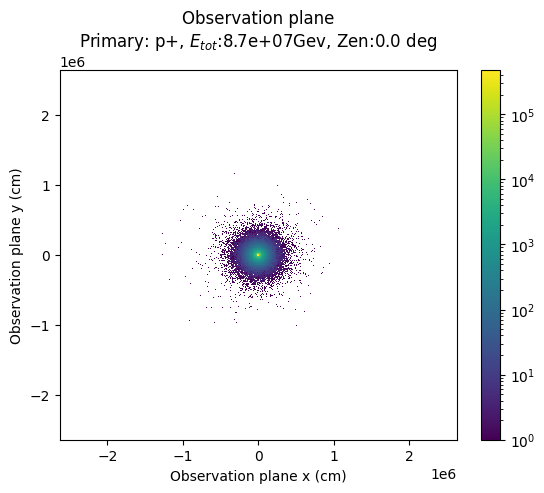

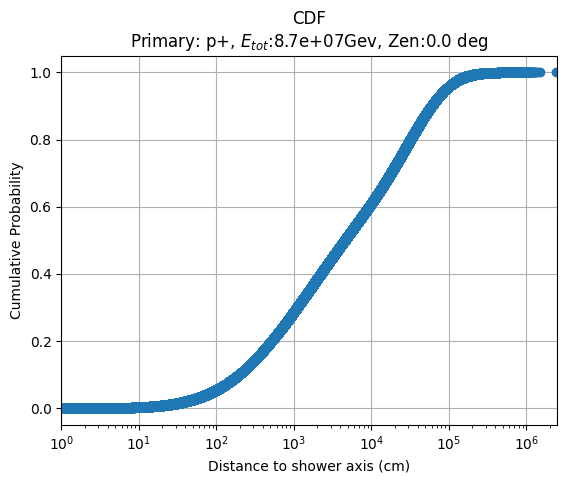

In [ ]:
# retain only true particles: discard mother and granmother particles
particles = b.particles[b.particles["particle_description"]>0]
plottitles= "Primary: p+, $E_{tot}$:"+f"{b.header["total_energy"]:.1e}"+"Gev, Zen:0.0 deg"

# Plot histogram of particle density along Observation plane
nbins=500
extreme = np.max(np.abs([particles["x"],-particles["x"],particles["y"],-particles["y"]]))
extreme = extreme*1.1
bins = np.linspace(-extreme, extreme, nbins + 1)
plt.hist2d(particles["x"],particles["y"], bins=bins, norm=colors.LogNorm())
plt.xlabel("Observation plane x (cm)"), plt.ylabel("Observation plane y (cm)")
plt.title("Observation plane particle distribution\n"+plottitles)
plt.colorbar()

# Plot of cumulative distribution function of particle distance from shower axis
dist = (particles["x"]**2+particles["y"]**2)**(0.5)
sorted_data = np.sort(dist)  
cdf = np.arange(1, len(dist) + 1) / len(dist) 
plt.figure()
plt.plot(sorted_data, cdf, marker="o", linestyle="none")
plt.xlabel("Distance to shower axis (cm)"), plt.ylabel("Cumulative Probability")
plt.title("CDF\n"+plottitles)
plt.xlim([1,plt.xlim()[-1]])
plt.grid()
plt.xscale("log")
plt.show()

In [ ]:
# Select muons and neutrinos
mu = b.particles[(b.particles["particle_description"]>=6000) * (b.particles["particle_description"]<7000)]
vie = b.particles[(b.particles["particle_description"]>=66000) * (b.particles["particle_description"]<67000)]
vimu = b.particles[(b.particles["particle_description"]>=69000) * (b.particles["particle_description"]<70000)]
len(mu), len(vie), len(vimu)

(409641, 34395, 291793)

In [48]:
mu

array([(6541., -0.4528087 , 0.26545635,  6.781296 , -115933.71 , 70580.94 , 376529.9 ),
       (6531., -0.25132826, 0.5223692 , 85.633575 ,   -4370.503, 12400.894, 376358.78),
       (6531., -0.1513773 , 0.44920492, 13.833615 ,  -22477.693, 37111.04 , 376381.75),
       ...,
       (6541.,  0.01575468, 0.14271984,  4.8334374,    2700.041, 51710.016, 376390.5 ),
       (6551., -0.1333096 , 0.34671122,  7.354776 ,  -33799.305, 54927.555, 376422.1 ),
       (6551., -0.5434219 , 0.4256763 , 17.15399  ,  -36413.926, 24067.87 , 376387.72)],
      dtype=[('particle_description', '<f4'), ('px', '<f4'), ('py', '<f4'), ('pz', '<f4'), ('x', '<f4'), ('y', '<f4'), ('t', '<f4')])

## Analyzing muons

### observation Plane

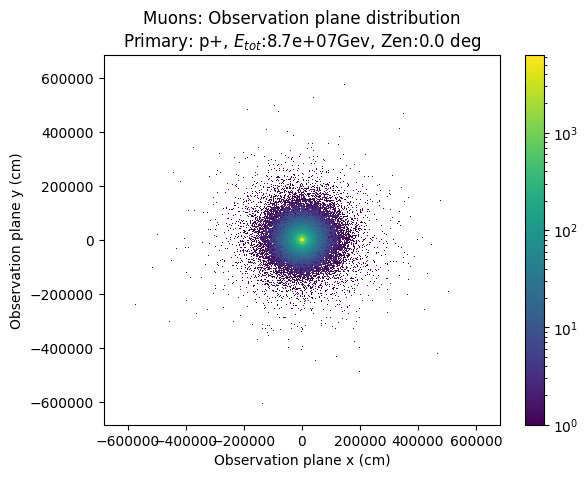

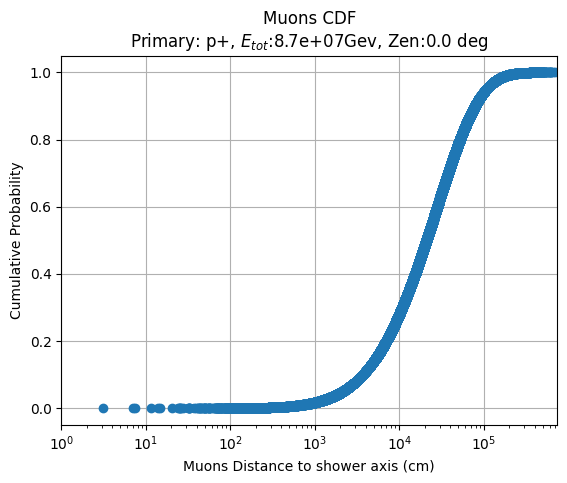

In [107]:
plottitles= "Primary: p+, $E_{tot}$:"+f"{b.header["total_energy"]:.1e}"+"Gev, Zen:0.0 deg"

# Plot histogram of particle density along Observation plane
nbins=500
extreme = np.max(np.abs([mu["x"],-mu["x"],mu["y"],-mu["y"]]))
extreme = extreme*1.1
bins = np.linspace(-extreme, extreme, nbins + 1)
plt.hist2d(mu["x"],mu["y"], bins=bins, norm=colors.LogNorm())
plt.xlabel("Observation plane x (cm)"), plt.ylabel("Observation plane y (cm)")
plt.title("Muons: Observation plane distribution\n"+plottitles)
plt.colorbar()



dist = (mu["x"]**2+mu["y"]**2)**(0.5)
sorted_data = np.sort(dist)  
cdf = np.arange(1, len(dist) + 1) / len(dist) 
plt.figure()
plt.plot(sorted_data, cdf, marker="o", linestyle="none")
plt.xlabel("Muons Distance to shower axis (cm)"), plt.ylabel("Cumulative Probability")
plt.title("Muons CDF\n"+plottitles)
plt.xlim([1,plt.xlim()[-1]])
plt.grid()
plt.xscale("log")
plt.show()

### momentum space

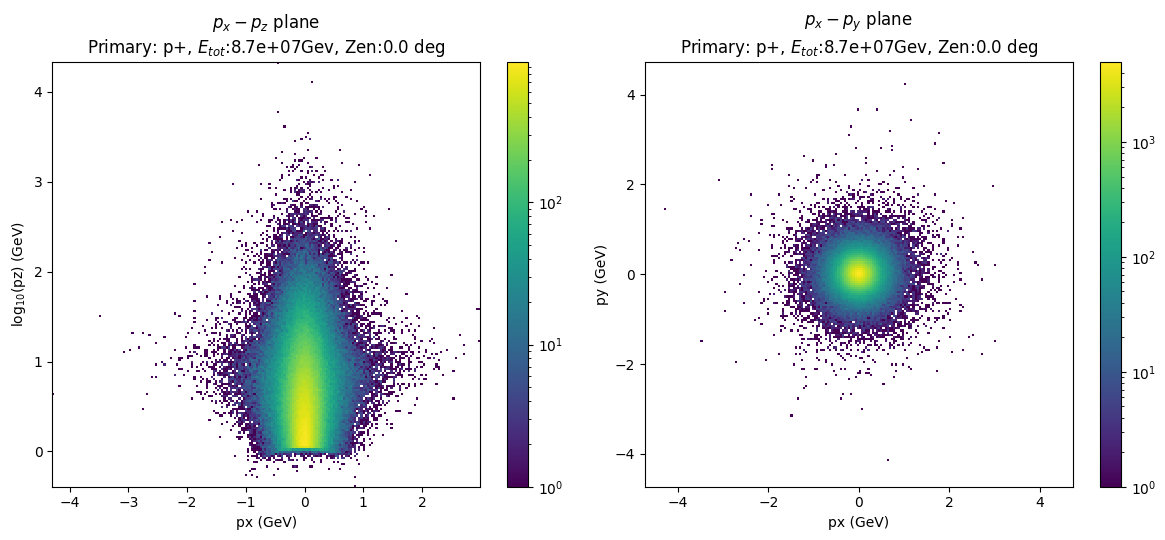

In [117]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5.5))
nbins = 200
# Distribution: px vs pz
h0 = axs[0].hist2d(mu["px"], np.log10(mu["pz"]), bins=nbins, norm=colors.LogNorm())
axs[0].set_xlabel("px (GeV)")
axs[0].set_ylabel("log$_{10}$(pz) (GeV)")
axs[0].set_title("$p_x-p_z$ plane\n" + plottitles)
fig.colorbar(h0[3], ax=axs[0])

# Distribution: px vs py
extreme = np.max(np.abs([mu["px"],-mu["px"],mu["py"],-mu["py"]]))
extreme = extreme*1.1
bins = np.linspace(-extreme, extreme, nbins + 1)
h1 = axs[1].hist2d(mu["px"], mu["py"], bins=bins, norm=colors.LogNorm())
axs[1].set_xlabel("px (GeV)")
axs[1].set_ylabel("py (GeV)")
axs[1].set_title("$p_x-p_y$ plane\n" + plottitles)
fig.colorbar(h1[3], ax=axs[1])

plt.tight_layout()
plt.show()

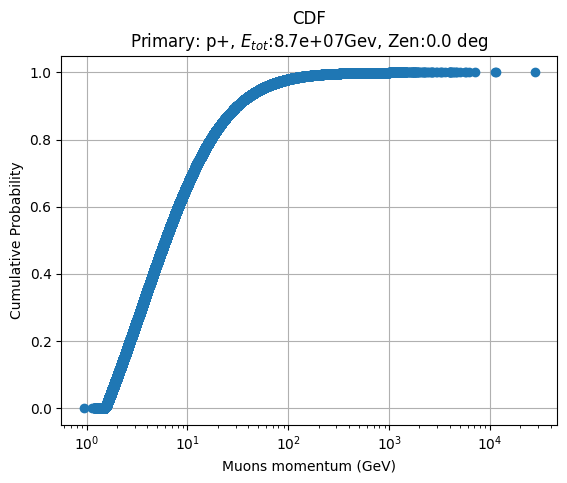

In [102]:
# Plot of cumulative distribution function of particle momentum
momentum = (mu["px"]**2+mu["pz"]**2+mu["pz"]**2)**(0.5)
sorted_data = np.sort(momentum)  
cdf = np.arange(1, len(momentum) + 1) / len(momentum) 
plt.figure()
plt.plot(sorted_data, cdf, marker="o", linestyle="none")
plt.xlabel("Muons momentum (GeV)"), plt.ylabel("Cumulative Probability")
plt.title("CDF\n"+plottitles)
plt.grid()
plt.xscale("log")
plt.show()

## Study - correlations of angles of radial position and transverse momentum

25.0
7.71
98898860.0


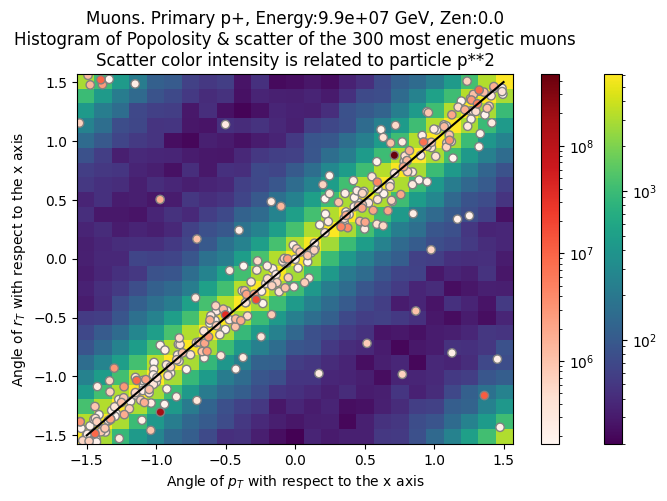

In [ ]:
from corsikaio import CorsikaParticleFile
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
ff = '/DataCorsika7/job25_contver76310_em_pr14_e5e7-1e8_z0-0/DAT000025' 


k = 1 # event number to be selected

# starting to read the Corsika file - selecting k-th event
with CorsikaParticleFile(ff) as f:
    print(f.run_header['run_number'])
    print(f.version)
    
    for i,e in enumerate(f):
        if i==k:
        # select k-th event
            b = e
            break
print(b.header["total_energy"])

# selecting muons
mu = b.particles[(b.particles["particle_description"]>=6000) * (b.particles["particle_description"]<7000)]
tetap = np.arctan(mu["py"]/mu["px"])      # angle of the pt
tetar = np.arctan(mu["y"]/mu["x"])        # angle of rt
p = mu["py"]**2+mu["px"]**2+mu["pz"]**2   # total momentum
energyes = b.header["total_energy"]       # energy of the primary particle  

# plotting angle(rt) vs angle(pt) and the scatter related to the 300 most energetic muons
fig, ax = plt.subplots(figsize=(8,5))
plt.title(f"Muons. Primary p+, Energy:{energyes:.1e} GeV, Zen:0.0\nHistogram of Popolosity & scatter of the 300 most energetic muons"+
          "\nScatter color intensity is related to particle p**2")
plt.hist2d(tetap,tetar,norm=colors.LogNorm(), bins=25)
plt.colorbar(pad=-0.03)
indexes = np.argsort(p)[-300:]
plt.scatter(tetap[indexes],tetar[indexes], c=p[indexes],cmap="Reds", edgecolor="grey",norm=colors.LogNorm())
plt.xlabel("Angle of $p_T$ with respect to the x axis")
plt.ylabel("Angle of $r_T$ with respect to the x axis")
plt.colorbar()
plt.subplots_adjust(top=0.85)  